In [1]:
import numpy as np 
import obspy
import matplotlib.pyplot as plt
import os,glob
import pandas as pd
import pystp
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

Run function for SNR computation for later

In [12]:
def compute_snr(trace, noise_start, noise_end, signal_start, signal_end):
    """
    Compute the Signal-to-Noise Ratio (SNR) for a given ObsPy Trace.

    :param trace: ObsPy Trace object containing waveform data
    :param noise_start: Start time of noise window (relative to trace.stats.starttime)
    :param noise_end: End time of noise window
    :param signal_start: Start time of signal window
    :param signal_end: End time of signal window
    :return: SNR value in decibels (dB)
    """
    # Extract the noise and signal windows
    noise_window = trace.slice(trace.stats.starttime + noise_start, trace.stats.starttime + noise_end)
    signal_window = trace.slice(trace.stats.starttime + signal_start, trace.stats.starttime + signal_end)

    # Compute RMS (Root Mean Square) amplitudes
    noise_rms = np.sqrt(np.mean(noise_window.data**2))
    signal_rms = np.sqrt(np.mean(signal_window.data**2))

    # Compute SNR in dB
    snr = 20 * np.log10(signal_rms / noise_rms) if noise_rms > 0 else np.inf  # Avoid division by zero

    return snr

Add UTC date time of earthquake here. Time range from about 10 minutes before to 20 minutes after 

In [8]:
#sets time range for selected earthquake
time1=obspy.UTCDateTime(2017,5,29,18,50,0)
time2=obspy.UTCDateTime(2017,5,29,19,30,0)

print('Times from ',time1,' to ',time2)

Times from  2017-05-29T18:50:00.000000Z  to  2017-05-29T19:30:00.000000Z


In [9]:
client=Client("IRIS")
#creates inventory of stations
inv=client.get_stations(latitude=33,longitude=-116,maxradius=300/111,
                        starttime=time1,endtime=time2,network='*',channel='HHZ',
                        level='response',includeavailability=True)

print(inv)

Inventory created at 2025-05-05T09:46:18.823200Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2017-05-29...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (11):
			AE, AZ, BC, CI, MX, PB, PY, RB, SB, TA, YN
		Stations (245):
			AE.113A (Mohawk Valley, Roll, AZ, USA)
			AE.Y14A (Wickenburg, AZ, USA)
			AZ.BZN (Buzz Northerns Place, Anza, CA, USA)
			AZ.CPE (Camp Elliot, Miramar, CA, USA)
			AZ.CRY (Cary Ranch, Anza, CA, USA)
			AZ.FRD (Ford Ranch, Anza, CA, USA)
			AZ.KNW (Keenwild Fire Station, Mountain Center, CA, USA)
			AZ.LVA2 (Lost Valley Scout Camp, CA, USA)
			AZ.MONP2 (Monument Peak TA Vault, Mt. Laguna, CA, USA)
			AZ.PFO (Pinyon Flats Observatory, CA, USA)
			AZ.RDM (Red Mountain, Riverside Co, CA, USA)
			AZ.RRSP (Rouse Ridge, CA, USA)
			AZ.SIO5 (Mt. Soledad, La Jolla, CA)
			AZ.SMER (Santa Margarita Ecological Reserve, CA, USA)
			AZ.SND (Jim Saunders Place, Anza, CA, USA)
		

Edit to save inventory locally 

In [5]:
#saves inventory
directory = r"C:/Users/lan66/4th year project/2nd term/earthquake11"
filename=os.path.join(directory,"inventory11.xml")
inv.write(filename, format="STATIONXML")

In [10]:
# Extracts all channels from each station in each network of inventory 
bulk=[]
for nw in inv:
    for stn in nw:
        print(f"Station: {stn.code}, Channels: {[chan.code for chan in stn]}")
        for chn in stn:
            bulk.append((nw.code,stn.code,"*",chn.code,time1,time2))
print(bulk)

Station: 113A, Channels: ['HHZ']
Station: Y14A, Channels: ['HHZ']
Station: BZN, Channels: ['HHZ']
Station: CPE, Channels: ['HHZ']
Station: CRY, Channels: ['HHZ']
Station: FRD, Channels: ['HHZ']
Station: KNW, Channels: ['HHZ']
Station: LVA2, Channels: ['HHZ']
Station: MONP2, Channels: ['HHZ']
Station: PFO, Channels: ['HHZ']
Station: RDM, Channels: ['HHZ']
Station: RRSP, Channels: ['HHZ']
Station: SIO5, Channels: ['HHZ']
Station: SMER, Channels: ['HHZ']
Station: SND, Channels: ['HHZ']
Station: TMSP, Channels: ['HHZ']
Station: TRO, Channels: ['HHZ']
Station: WMC, Channels: ['HHZ']
Station: ALAMX, Channels: ['HHZ']
Station: CBX, Channels: ['HHZ']
Station: CCX, Channels: ['HHZ']
Station: CHX, Channels: ['HHZ']
Station: DOCTX, Channels: ['HHZ']
Station: DOCX, Channels: ['HHZ']
Station: GUVIX, Channels: ['HHZ']
Station: JARAX, Channels: ['HHZ']
Station: PESCX, Channels: ['HHZ']
Station: PIX, Channels: ['HHZ']
Station: RHX, Channels: ['HHZ']
Station: RITX, Channels: ['HHZ']
Station: RMX, Chann

In [11]:
# Downloads waveforms in chunks of N from bulk, appending them to a Stream
N=10
k=0
st=obspy.Stream()
while k<len(bulk):
    print('Grabbing waveforms {:d} to {:d} of {:d}'.format(k,k+N,len(bulk)))
    try:
        st=st+client.get_waveforms_bulk(bulk[k:k+N],attach_response=True)
    except:
        print('Failed group {:d}'.format(k))
    k=k+N

Grabbing waveforms 0 to 10 of 247
Grabbing waveforms 10 to 20 of 247
Grabbing waveforms 20 to 30 of 247
Grabbing waveforms 30 to 40 of 247
Grabbing waveforms 40 to 50 of 247
Grabbing waveforms 50 to 60 of 247
Grabbing waveforms 60 to 70 of 247
Grabbing waveforms 70 to 80 of 247
Grabbing waveforms 80 to 90 of 247
Grabbing waveforms 90 to 100 of 247
Grabbing waveforms 100 to 110 of 247
Grabbing waveforms 110 to 120 of 247
Failed group 110
Grabbing waveforms 120 to 130 of 247
Failed group 120
Grabbing waveforms 130 to 140 of 247
Grabbing waveforms 140 to 150 of 247
Grabbing waveforms 150 to 160 of 247
Failed group 150
Grabbing waveforms 160 to 170 of 247
Grabbing waveforms 170 to 180 of 247
Grabbing waveforms 180 to 190 of 247
Grabbing waveforms 190 to 200 of 247
Grabbing waveforms 200 to 210 of 247
Failed group 200
Grabbing waveforms 210 to 220 of 247
Grabbing waveforms 220 to 230 of 247
Grabbing waveforms 230 to 240 of 247
Grabbing waveforms 240 to 250 of 247


In [13]:
print(st)

94 Trace(s) in Stream:

AE.113A..HHZ | 2017-05-29T18:50:00.000000Z - 2017-05-29T19:30:00.000000Z | 100.0 Hz, 240001 samples
...
(92 other traces)
...
YN.TR04..HHZ | 2017-05-29T18:50:00.004500Z - 2017-05-29T19:29:59.999500Z | 200.0 Hz, 480000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Edit to save waveforms locally

In [9]:
#save the waveforms, edit the directory and names saved under
directory =r'C:/Users/lan66/4th year project/2nd term/earthquake11'
filename1 = os.path.join(directory,"traces11.mseed")
st.write(filename1, format='mseed')

In [14]:
# Creates a copy of stream and filters
# Filtering includes detrending, tapering, highpass filter, removing instrument response, and resampling to 100 Hz
st_filt =st.copy()
st_filt.detrend()
st_filt.taper(max_length=10,max_percentage=0.5)
st_filt.filter("highpass", freq=0.5 )
pre_filt = [0.001, 0.005, 100, 200]
st_filt.remove_response(inventory = inv, pre_filt=pre_filt, output="VEL")
st_filt.resample(sampling_rate=100, no_filter=True)


94 Trace(s) in Stream:

AE.113A..HHZ | 2017-05-29T18:50:00.000000Z - 2017-05-29T19:30:00.000000Z | 100.0 Hz, 240001 samples
...
(92 other traces)
...
YN.TR04..HHZ | 2017-05-29T18:50:00.004500Z - 2017-05-29T19:29:59.994500Z | 100.0 Hz, 240000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

Edit to save the filtered waveforms locally 

In [12]:
#save the filtered waveforms, edit the directory and names saved under
directory =r'C:/Users/lan66/4th year project/2nd term/earthquake11'
filename = os.path.join(directory,"filttraces11.mseed")
st_filt.write(filename, format='mseed')

Edit to earthquake's UTCDateTime start time

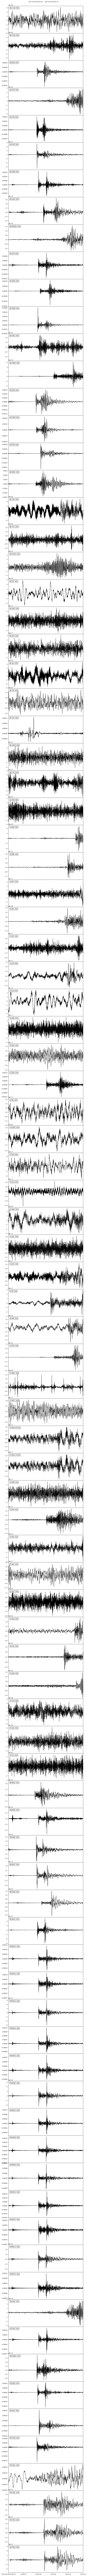

In [15]:
#plots seismograms, edit start time and time window if necessary
starttime = UTCDateTime("2017-05-29T19:00:50")
st_filt.plot(starttime=starttime, endtime=starttime+25, equal_scale=False);

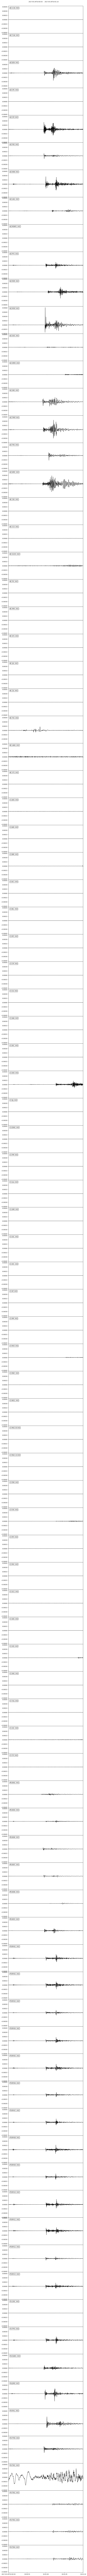

In [16]:
#plot with equal scale for reference 
st_filt.plot(starttime=starttime, endtime=starttime+20);

1. Change station selection to a station with a clear seismogram
2. Manually pick the P-wave arrival of the mainshock
3. Check the SNR is above 10
4. Record the network.station and UTCDateTime in a .txt file
5. Repeat for all clear stations

1 Trace(s) in Stream:
AZ.KNW..HHZ | 2017-05-29T18:50:00.008400Z - 2017-05-29T19:29:59.998400Z | 100.0 Hz, 240000 samples


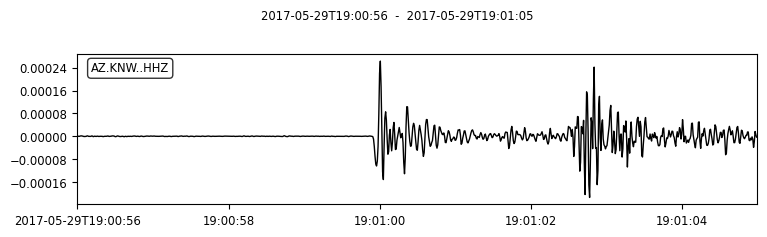

In [23]:
#select out one station with a clear waveform
st=st_filt.select(station="knw", channel="HHZ")
#st.filter("highpass", freq=1)
print(st)
st.plot(starttime=starttime+6,endtime=starttime+15);

Station KNW - SNR: 29.40 dB


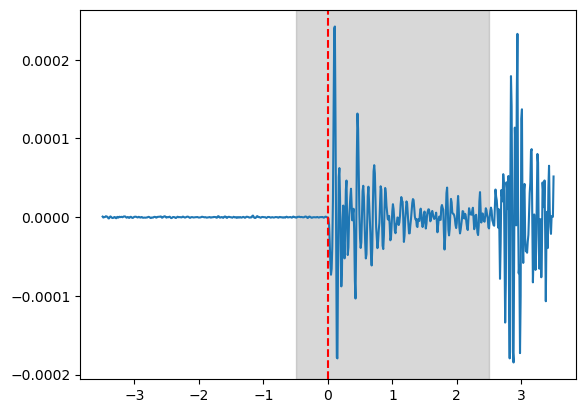

In [34]:
#edit for each station's p wave arrival time 
arrival_time=obspy.UTCDateTime(2017,5,29,19,0,59.9)
tr=st[0].copy()
tr.stats.t0=arrival_time-tr.stats.starttime
#tr.stats.t1
tr.filter("highpass", freq=1)

picked_arr=tr.stats.starttime #tr.stats.t0 #
#print(picked_arr+tr.stats.t0)
#print(tr.stats)
t0 = tr.stats.t0
times=tr.times()-t0
ii=np.logical_and(times>=-3.5,times<=3.5)
import matplotlib.pyplot as plt
plt.plot(times[ii],tr.data[ii])
plt.axvline(0,color='r',linestyle='--')
plt.axvspan(xmin=-.5,xmax=2.5,color='gray',alpha=0.3)

noise_start = t0-100       # Start of noise window (in seconds)
noise_end = t0-50        # End of noise window
signal_start = t0-20     # Start of signal window  
signal_end = t0      # End of signal window  
snr = compute_snr(tr, noise_start, noise_end, signal_start, signal_end)
print(f"Station {tr.stats.station} - SNR: {snr:.2f} dB")

Record each station and the UTC date in a txt file. Example format: AZ.KNW, 2017,5,29,19,0,59.9